# Data Wrangling Project: WeRateDogs Twitter Data Analysis

## Project Overview

> WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. They have graciously provided their twitter archive via email for this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.   

>The main goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Table of Contents

1. Gathering Data

2. Assessing Data

3. Cleaning Data

4. Storing Data

5. Analyzing and Visualizing Data

## Data Wrangling
> This project's objective is to gather data from different sources,for assessesment and cleaning to fix and improve the quality and tidiness of the data.
>The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. So therefore  In this project data will be gathered from 3 sources:

* 1 Enhanced Twitter Archive
* 2 Image Prediction File
* 3 Twitter API

### Importing Neccesary Packages

In [7]:
# Importing packages
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings

## Gathering Data

#### 1. Enhanced Twitter Archive : import twitter_archive_enhanced.csv using read_csv

In [8]:
# Importing the WeRateDogs Twiter archive into a DataFrame
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

In [9]:
# confirming DataFrame was created succesfullly
twitter_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2. Image Prediction File: Download the image prediction file programmatically using Requests library

In [10]:
# Creating a directory that doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [11]:
# Defining the url and use the request.get method, if result = Response 200, then successful
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [12]:
# Accessing the content and writing to a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [13]:
# Importing the file into a DataFrame using read_csv
df_predictions = pd.read_csv(url, sep = '\t')

In [ ]:
# confirming DataFrame was created succesfullly
df_predictions.head(3)

#### 3. Twitter API: Gathering additional data via Twitter API using Tweepy library

In [9]:
# Importing neccessary packages
from tweepy import OAuthHandler
from timeit import default_timer as time

In [10]:
# Personal Twitter API Keys, secrets and tokens. Hidden to comply with Twitter's terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN' 
access_secret = 'HIDDEN'

In [11]:
# Creating the Twitter API object and setting rate limit param
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [12]:
# getting a list of tweet_id's to use to gather data via Twitter API from the enhanced twitter archive 
tweet_ids = twitter_arch.tweet_id.values
print('# of tweet_ids: ' + str(len(tweet_ids)))
tweet_ids

# of tweet_ids: 2356


array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [13]:
# Testing the API by getting the status of a tweet_id
status = api.get_status(892420643555336193, tweet_mode = 'extended')
status

Status(_api=<tweepy.api.API object at 0x0000026FABE96700>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

In [20]:
import time

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
errors = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            errors[tweet_id] = e
            pass
end = time.time()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [21]:
errors

{888202515573088257: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 873697596434513921: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872668790621863937: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 872261713294495745: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 869988702071779329: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 866816280283807744: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 861769973181624320: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856602993587888130: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 856330835276025856: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851953902622658560: tweepy.errors.NotFound('404 Not Found\n144 - No status found with that ID.'),
 851861385

In [22]:
print(len(errors))

30


#### *Reading JSON file into Pandas DataFrame*

In [24]:
# Creating an empty list to read in JSON data from the text file, and then convert to a Pandas DataFrame
json_data = []

# Opening and Reading the text file
with open('tweet_json.txt', 'r') as json_file:
    # Reading the first line to start a loop
    for line in json_file.readlines():
        tweet = json.loads(line)
        # Extracting variables from JSON data to get required columns
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        # Appending each to empty list
        json_data.append({"tweet_id" : tweet_id,
                          "retweet_count" : retweet_count,
                          "favorite_count" : favorite_count
            
        })

In [26]:
# Converting to Pandas DataFrame
df_json = pd.DataFrame(json_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [28]:
#confirming it worked
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33703
1,892177421306343426,5276,29230
2,891815181378084864,3465,21976
3,891689557279858688,7193,36802
4,891327558926688256,7719,35187


In [29]:
# Exporting DataFrame to csv file
df_json.to_csv('df_json.csv', index = False)

## Assessing Data

> Now that the gathering stage is complete, the three datasets will be assessed `Visually and Programmatically` for **Quality** and **Tidiness** issues. 
> The Quality of the data will be assessed for: Completeness, Validity, Accuracy and Consistency. While Tidiness will be in regards to the structure of the data.

* 1 Enhanced Twitter Archive 
* 2 Image Prediction File
* 3 Twitter API

### 1. Assessing Enhanced Twitter Archive

###### Notes

> A brief description of the column headers according to Twitter data dictionary: 

* .tweet_id represents each unique id for each tweet
* .in_reply_to_status_id: int64. Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet's ID
* .in_rely_to_user_id: int64. Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly
* .timestamp contains the time and the date tweet was tweeted
* .source tweet source i.e utility used to post the tweet as an HTML-formatted string 
* .text is the tweet content,The actual UTF-8 text of the status update 
* .retweeted_status_id: This attribute contains a representation of the original Tweet that was retweeted.
* .retweeted_status_user_id: The id of the retweeted status user
* .retweeted_status_timestamp: This attribute contains a representation of the time the original Tweet was retweeted
* .expanded_urls: This is the tweet url ( can be used to access the tweet directly)
* .rating_numerator: dog ratings numerator 
* .rating_denominator: dog ratings dnominator
* .name: the name of the dog
* .doggo, floofer, pupper, puppo : according to Udacity these are various dog stages

##### Visual Assessment

In [393]:
# Visually assessing the data by scrolling through
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


>Most of the visual assessment will be done in Excel sheet because some rows cannot be assessed because they are collapsed due to the size and also the difficulty of navigating through the DataFrame in this notebook.

##### Programmatic Assessment

In [14]:
# Viewing the first 5 rows of the DataFrame
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# Viewing the last 5 rows of the DataFrame
twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
# Checking random samples of the DataFrame
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1229,713761197720473600,NaN,NaN,2016-03-26 16:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Piper. She would really like that tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713761197...,12,10,Piper,None,None,None,None
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None
709,785170936622350336,NaN,NaN,2016-10-09 17:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hero. He was enjoying the car ride unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785170936...,11,10,Hero,None,None,None,None
624,795464331001561088,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


##### Observations
 _Quality_ 
 
* Source has characters in its values, making it hard to read
* From the view of the last 5 rows there seems to be some inconsistencies in the name column: lower case invalid strings e.g a, an etc.
  
  _Tidiness_  
  
* The dog stages are in seperate columns which breaks the tidiness rule                 

In [17]:
# Assessing the column names
twitter_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [18]:
# Getting a concise summary
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Observations
  _Quality_ 
 
* Timestamp is a string(object)
* tweet_id is an integer
* dog stages are strings(ojects)
* The epanded_urls,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_timestamp and retweeted_status_id columns have missing values
* The following volums are floats instead of integers; in_reply_to_status_id, in_reply_to_user_id,       retweeted_status_id,retweeted_status_id. 

In [19]:
# Getting summary statistic
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000



 ##### Observations
  _Quality_ 
 
* There seems to be inconsistencies in the rating_numerator and rating_denominator columns respectively, they have the following max figures 1776 and 170. Which shouldn't be.
 

In [20]:
# Checking for duplicate values
twitter_arch.duplicated().sum()

0

In [21]:
# Checking for missing values
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Getting the unique values of source
twitter_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

 ##### Observations
 _Quality_
 
* There are only 4 unique sources: 
    1. Twitter for Iphone
    2. Vine - Make a Scene
    3. Twitter Web Client
    4. TweetDeck     

In [23]:
# Checking for number of rows with invalid string in the name column
twitter_arch['name'].value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

 ##### Observations
 _Quality_
 
* we can see the name column has 745 `None` values, we also notice the prescence of invalid name strings as observed earlier when we viewed the last 5 rows using .tail() and where the actual names start with Upper cases. These strings start with lower case

In [24]:
# Using RegEx to get the names starting with lowercase
lowercase_name = twitter_arch['name'].str.contains('^[a-z]', regex = True)
twitter_arch[lowercase_name].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [25]:
# Getting the number of lowercase values in the name column
len(twitter_arch[lowercase_name].name)

109

 ##### Observations
 _Quality_
 
* There are 109 lower case values that are not actually dog names present in the name columns

In [26]:
# Checking the number of tweets with missing Urls
twitter_arch['expanded_urls'].isna().sum()

59

##### Observations
 _Quality_
 
* There are 59 tweets with missing urls

In [27]:
# Getting the number of unique values in the rating_denominator column in descending order
twitter_arch['rating_denominator'].value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
len(twitter_arch[twitter_arch['rating_denominator'] != 10])

23

##### Observations
 _Quality_
 
* We can see that there are 23 ratings that have denominators not equal to 10, which shows inconsistency

In [29]:
# Getting the number of unique values in the rating_numerator column in descending order
twitter_arch['rating_numerator'].value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [30]:
len(twitter_arch[twitter_arch['rating_numerator'] >= 15])

28

##### Observations
 _Quality_
 
* We see that there are 28 ratings that have numerators higher than 15; using 15 as a low boundary because 14 has 54 counts. These obviously points to why we observed a large number in our summary statistic earlier. But this does not necessarily pose an issue due to the WeRateDogs unique rating system

In [31]:
# Checking out the context of the first 4 texts
twitter_arch.text.iloc[0:4]

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
Name: text, dtype: object

### 2. Assessing Image Prediction File

###### Notes

> A brief description of the column headers according to Udacity: 

* tweet_id- unique id for each tweet, it is the last part of the tweet URL after "status/"
* p1 is the algorithm's #1 prediction for the image in the tweet
* p1_conf is how confident the algorithm is in its #1 prediction 
* p1_dog is whether or not the #1 prediction is a breed of dog 
* p2 is the algorithm's second most likely prediction 
* p2_conf is how confident the algorithm is in its #2 prediction 
* p2_dog is whether or not the #2 prediction is a breed of dog
* p3 - the algorithm's #3 prediction for the image in the tweet
* p3_conf - how confident the algorithm is in its #3 prediction
* p3_dog- whether or not the #3 prediction is a breed of dog


##### Visual Assessment

In [32]:
# Visally assessing the data by scrolling through
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Programmatic Assessment

In [33]:
# Viewing the first 5 rows
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
# Viewing the last 5 rows
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
# Viewing random samples
df_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True
1991,873580283840344065,https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg,1,Newfoundland,0.678537,True,Tibetan_mastiff,0.244022,True,chow,0.048530,True
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True


In [36]:
# Viewing the columns
df_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [37]:
# Getting a concise summary of the data
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
# Getting the summary statistics of numerical values
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [39]:
# Getting the sum of duplicated values
df_predictions.duplicated().sum()

0

In [40]:
# Checking for missing values
df_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [41]:
# Getting the number of unique values in the p1 column
df_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [42]:
# Getting the number of unique values in the p1_dog column
df_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [43]:
# Getting the number of unique values in the p2 column
df_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [44]:
# Getting the number of unique values in the p2_dog column
df_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [45]:
# Getting the number of unique values in the p3 column
df_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [46]:
# Getting the number of unique values in the p3_dog column
df_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### 3. Assessing Twitter API

In [47]:
# importing the csv file
df_json = pd.read_csv('df_json.csv')

###### Notes

> A brief description of the column headers:

* tweet_id : the unique id of each tweet
* retweet_count : the number of retweets of a tweet
* favorite_count : the number of likes of a tweet

##### Visual Assessment

In [48]:
# Visually assessing the dataframe
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33703
1,892177421306343426,5276,29230
2,891815181378084864,3465,21976
3,891689557279858688,7193,36802
4,891327558926688256,7719,35187
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,115,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


##### Programmatic Assessment

In [49]:
# viewing the first 5 rows
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33703
1,892177421306343426,5276,29230
2,891815181378084864,3465,21976
3,891689557279858688,7193,36802
4,891327558926688256,7719,35187


In [50]:
# viewing the last 5 rows
df_json.tail()

,tweet_id,retweet_count,favorite_count
2321,666049248165822465,36,88
2322,666044226329800704,115,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112
2325,666020888022790149,419,2285


In [51]:
# viewing sample rows
df_json.sample(5)

,tweet_id,retweet_count,favorite_count
2108,670040295598354432,96,657
877,758099635764359168,9111,17652
1751,677698403548192770,286,1117
1660,681340665377193984,246,1517
1890,674265582246694913,727,1456


In [52]:
# Gteting a concise summary
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [53]:
# Checking for duplicates
df_json.duplicated().sum()

0

In [54]:
# Checking for missing values
df_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Summary of Quality Issues

_Twitter archive_

1. retweeted_status_id, retweeted_status_timestamp and retweeted_status_id have non null values i.e they contain actual value which we don't need, and we are only interested in original tweets


2. in_reply_to_status_id, in_reply_to_user_id, have non null values, we are only interested in original tweets


3. Expanded urls column contains missing values


4. Source column has characters(href; combination of Url and text) in its values, making it hard to read


5. The rating denominator column contains values that are not equal to 10


6. Invalid dog names in the name columns


7. There are `None` values in the name column(may not be dropped)


8. Tweet id is an integer


9. Timestamp is a string(object)


10. Dog stages are string(objects)


11. Irrelevant columns not needed for analysis like; retweeted_status_id, retweeted_status_timestamp etc.




_Image Predictions_

12. There are missing data present in this DataFrame because there are 2075 tweet ids that is 281 tweet ids short of the number in the twitter archive.


13. Img_num column not needed for analysis




_Twitter API data_

14. These data also contains missing data, with 2,326 tweet ids, 30 tweet ids short of tweet ids in the Twitter archive. This may have to do with the TweepErrors reported.






### Summary of Tidiness Issues

_Twitter Archive_

1. Dog stages( doggo, pupper, puppo, and floof(er)), from the Twitter archive DataFrame are in different columns


_Image Predictions_

2. Columns p1, p2, and p3 contain the same type of data, predictions as well as p1_dog, p2_dog, p3_dog, boolean values indicating whether the prediction is a type of dog and p1_conf, p2_conf, p3_conf, are confidence values. These trumps the rule of tidy data


3. The dataframe can be merged with twitter archive


_Twitter API data_

4. Tweet API data(df_json) can be merged with Twitter archive and Image predictions

## Cleaning Data

> Perform cleaning activities on the issues documented during data assessment. Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame

In [55]:
# Firstly, create copies of each DataFrame for cleaning 
archive_clean = twitter_arch.copy()
predictions_clean = df_predictions.copy()
json_clean = df_json.copy()

In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality 1 - Twitter archive
> retweeted_status_id, retweeted_status_timestamp and retweeted_user_status_id have non null values

#### Define
> Drop rows containing retweets that are not null that is retweets rows that contain values, they include: retweeted_status_id, retweeted_status_timestamp and retweeted_user_id. This is because we are ony interested in original tweets ratings 

#### Code

In [57]:
# Filtering to get only rows were retweets is null
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [58]:
# Checking the retweeted status column for non null values
archive_clean.retweeted_status_id.notnull().sum()

0

In [59]:
# Checking the retweeted status user id column for non null values
archive_clean.retweeted_status_user_id.notnull().sum()

0

In [60]:
# Checking the retweeted status timestamp column for non null values
archive_clean.retweeted_status_timestamp.notnull().sum()

0

In [61]:
# Checking if retweets rows are successfully dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

We can see that all rows containing retweets have been successfully dropped. Now we only rows containing original tweets and no retweets

### Quality 2 - Twitter archive
> in_reply_to_status_id, in_reply_to_user_id, have non null values

#### Define
> Drop all rows related to replies that have non null values, because we are interested in only tweets : in_reply_to_status_id, in_reply_to_user_id

#### Code

In [62]:
#filtering to get only rows were replies are null
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [442]:
# Checking the in reply to status id column for non null values
archive_clean.in_reply_to_status_id.notnull().sum()

0

In [63]:
# Checking the in reply to user id column for non null values
archive_clean.in_reply_to_user_id.notnull().sum()

0

In [64]:
# Checking if reply rows are successfully dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

The reply rows have been succesfully droped so all data present in the DataFrame now are only original tweets

### Quality 3 - Twitter archive
> Expanded urls column contains missing values

#### Define
> Drop tweets with misssing expanded url rows which is a completeness issue

#### Code

In [66]:
# Confirming the number of null values 
archive_clean.expanded_urls.isnull().sum()

3

> We can see that the missing values have dropped from 59 as earlier observed to 3, this is apparently due to the retweet and replies rows we had dropped earlier

In [67]:
# Dropping the null rows
archive_clean = archive_clean[archive_clean['expanded_urls'].notnull()]

#### Test

In [68]:
archive_clean['expanded_urls'].isnull().sum()

0

### Quality 4 - Twitter archive
> Source column has characters(href; combination of Url and text) in its values, making it hard to read

#### Define
> Extract the source string between `<a href="">` and `</a>

#### Code

In [69]:
# Getting the unique values of each source
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [70]:
# Extracting the source string using RegEx
archive_clean['source'] = archive_clean.source.str.extract('^<a.+>(.+)</a>')

#### Test

In [71]:
archive_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Quality 5 - Twitter archive
> The rating denominator column contains values that are not equal to 10

#### Define
> Drop rows where rating denominator is not equal to 10 as these values are 23 from the observation in the assessing stage. It would not have any effect on the analysis

#### Code

In [72]:
# Filtering only rows where rating denominator is equal 10
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

#### Test

In [73]:
# Confirming the count of rows where rating denominator is not equal to 10
len(archive_clean[archive_clean['rating_denominator']!= 10])

0

In [74]:
# Checking to make sure all values in the rating_denominator are equal to 10
archive_clean.rating_denominator.value_counts()

10    2077
Name: rating_denominator, dtype: int64

### Quality 6 - Twitter archive
> Invalid dog names in the name columns

#### Define
> Replace invalid names in lowercase with `None` 

#### Code

In [75]:
# FIrstly, extract the invalid lowercase names into a DataFrame using RegEx
extract = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[extract].name.value_counts()

a               54
the              8
an               5
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [76]:
# Replacing the invalid values with None
archive_clean.loc[extract, 'name'] = "None"

#### Test

In [77]:
# checking for unique values
archive_clean[extract].name.value_counts().sort_index()

None    101
Name: name, dtype: int64

### Quality 7 - Twitter archive
> Tweet id is an integer not a string

> Timestamp is a string(object)

> Dog stages are string(objects)

#### Define
> Convert tweet_id to string, timestamp to datetime and dog stages to categorical data

#### Code

In [78]:
# Converting to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

In [79]:
# Converting to date time
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [80]:
# Converting to categorical data
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo' ]].astype('category')

#### Test

In [81]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2077 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2077 non-null   datetime64[ns, UTC]
 4   source                      2077 non-null   object             
 5   text                        2077 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2077 non-null   object             
 10  rating_numerator            2077 non-null   int64           

### Quality 8 - Twitter archive
> Irrelevant columns not needed for analysis like; retweeted_status_id, retweeted_status_timestamp etcrrelevant columns not needed for analysis like; retweeted_status_id, retweeted_status_timestamp etc 

#### Define
> Drop columns retweeted_status_id, retweeted_status_timestamp, retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, the rows of these columns have been dropped earlier during cleaning so they contain null values. The other columns are expanded_urls, and text. Because they are irrelevant to the analysis

#### Code

In [82]:
# Dropping all unnecessary columns
archive_clean = archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_timestamp', 'retweeted_status_user_id',
                              'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 
                              'text'], axis = 1)

#### Test

In [83]:
# Confirming list of columns
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality 9 - Image predictions
> Img_num column not needed for analysis

#### Define
> Drop Image number; img_num column, because it will not be needed for analysis

#### Code

In [84]:
predictions_clean.drop('img_num', axis = 1, inplace = True)

#### Test

In [85]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Tidiness 1 - Twitter archive
> Dog stages( doggo, pupper, puppo, and floof(er)), from the Twitter archive DataFrame are in different columns

#### Define
> Merge the 4 columns with dog stages; doggo, pupper, puppo, and floof(er) into one column called `dog_stages` using lambda. Then drop the 4 columns

#### Code

In [86]:
# Replacing the 'None' values in the colums with no space
archive_clean['doggo'].replace("None", "", inplace = True)
archive_clean['floofer'].replace("None", "", inplace = True)
archive_clean['pupper'].replace("None", "", inplace = True)
archive_clean['puppo'].replace("None", "", inplace = True)

In [87]:
# merge the columns with lambda
archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

In [88]:
# Quick check 
archive_clean.dog_stage.value_counts()

                1742
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

> oops from the result above we see that some dog stages are merged together, let's try and fix it. I will be picking the second dog stage in the merged string.

In [89]:
# Seperating and replacing 
archive_clean['dog_stage'].mask(archive_clean['dog_stage'] == 'doggopupper', 'pupper', inplace = True)
archive_clean['dog_stage'].mask(archive_clean['dog_stage'] == 'doggopuppo', 'puppo', inplace = True)
archive_clean['dog_stage'].mask(archive_clean['dog_stage'] == 'doggofloofer', 'floofer', inplace = True)

In [90]:
# Replacing empty spaces with 'None'
archive_clean['dog_stage'] = archive_clean.dog_stage.replace('', 'none')

In [91]:
# Dropping the 4 dog stages columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace = True)

#### Test

In [92]:
# Checking if separation and replacement worked
archive_clean.dog_stage.value_counts()

none       1742
pupper      229
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [93]:
# Checking if the columns were dropped successfully
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Tidiness 2 - Image Predictions
> columns p1, p2, and p3 contain the same type of data, predictions as well as p1_dog, p2_dog, p3_dog, boolean values indicating whether the prediction is a type of dog and p1_conf, p2_conf, p3_conf, are confidence values. These trumps the rule of tidy data

#### Define
> Create new columns `breed` and `confidence` in the predictions DataFrame. Then set conditions for the columns and select the breed with the highest confidence level and it's equivalent confidence level into the newly created columns. For cases were predictions are false set breed to none and confidence level to 0. Then drop the colums.

#### Code

In [94]:
# Setting conditions for selection
condition = [(predictions_clean['p1_dog'] == True),
            (predictions_clean['p2_dog'] == True),
            (predictions_clean['p3_dog'] == True)]

In [95]:
# setting predicted breed based on selection conditions  
choice_breeds = [predictions_clean['p1'],
              predictions_clean['p2'],
              predictions_clean['p3']]

In [96]:
# setting confidence levels based on selection conditions
choice_confidence = [predictions_clean['p1_conf'],
                     predictions_clean['p2_conf'],
                     predictions_clean['p3_conf']]

In [97]:
# Selecting breed based on the first successful condition using np.select
predictions_clean['breed'] = np.select(condition, choice_breeds, default = 'none' )

In [98]:
# Selecting confidence level based on the first successful condition using np.select
predictions_clean['confidence'] = np.select(condition, choice_confidence, default = 0 )

In [99]:
# Dropping the p columns
predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 
                       axis = 1, inplace = True)

#### Test

In [100]:
# Checking if columns were successfully added
predictions_clean.sample(7)

,tweet_id,jpg_url,breed,confidence
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,Great_Dane,0.173989
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,Italian_greyhound,0.382378
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,chow,0.243529
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,Chihuahua,0.275793
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,Staffordshire_bullterrier,0.757547
869,697616773278015490,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,Lhasa,0.521931
1948,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,Australian_terrier,0.207281


In [101]:
# Confirming if columns were dropped
list(predictions_clean)

['tweet_id', 'jpg_url', 'breed', 'confidence']

### Quality 10 - Image predictions & Twitter API 
> tweet_id is an integer

#### Define
> Convert tweet_id of both image predictions(predictions_clean) and Twitter API data(json_clean) from integer to string

#### Code

In [102]:
# converting to string
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [103]:
#converting to string
json_clean.tweet_id = json_clean.tweet_id.astype(str)

#### Test

In [104]:
# Confirming data type
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   breed       2075 non-null   object 
 3   confidence  2075 non-null   float64
dtypes: float64(1), object(3)
memory usage: 65.0+ KB


In [105]:
# Confirming data type
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   object
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Tidiness 3 & 4 - Image predictions & Twitter Api data 
> Tweet API data(df_json) can be merged with Twitter archive and Image predictions

#### Define
> Merge the Twitter archive cleaned data(archive_clean), the cleaned Image predictions data(predictions_clean) and the Twitter API data(json_clean)

#### Code

In [106]:
# Merge using inner for only matching tweets in all DataFrame on tweet_id 
dog_ratings = archive_clean.merge(json_clean, how = 'inner', on = 'tweet_id')

In [107]:
# Merge using inner for only matching tweets in all DataFrame on tweet_id 
merged_ratings = dog_ratings.merge(predictions_clean, how = 'inner', on = 'tweet_id')

#### Test

In [108]:
# Viewing merged DataFrame
merged_ratings.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,none,6973,33703,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,none,5276,29230,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,none,3465,21976,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,none,7193,36802,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,none,7719,35187,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [109]:
# Viewing the last rows
merged_ratings.tail()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
1940,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,None,none,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
1941,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,6,10,None,none,115,246,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
1942,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,9,10,None,none,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
1943,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,7,10,None,none,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
1944,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,8,10,None,none,419,2285,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074


In [110]:
# viewing sample rows
merged_ratings.sample(10)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
24,887101392804085760,2017-07-18 00:07:08+00:00,Twitter for iPhone,12,10,None,none,4971,26897,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,Samoyed,0.733942
1476,675153376133427200,2015-12-11 03:21:23+00:00,Twitter for iPhone,1,10,None,none,2257,5580,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,none,0.000000
1838,667885044254572545,2015-11-21 01:59:37+00:00,Twitter for iPhone,10,10,Stu,none,398,729,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,malamute,0.088530
274,828011680017821696,2017-02-04 22:45:42+00:00,Twitter for iPhone,11,10,Brutus,none,1981,9749,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,American_Staffordshire_terrier,0.936662
787,739932936087216128,2016-06-06 21:32:13+00:00,Twitter for iPhone,10,10,Rorie,none,982,3746,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,redbone,0.243904
1209,688179443353796608,2016-01-16 02:02:19+00:00,Twitter for iPhone,10,10,Lizzie,pupper,527,1977,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,none,0.000000
1251,685315239903100929,2016-01-08 04:21:00+00:00,Twitter for iPhone,11,10,None,none,943,3025,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,chow,0.470162
608,765719909049503744,2016-08-17 01:20:27+00:00,Twitter for iPhone,12,10,Brat,none,1984,6786,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,golden_retriever,0.969518
1023,704480331685040129,2016-03-01 01:36:14+00:00,Twitter for iPhone,11,10,Lucia,none,978,3143,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,Samoyed,0.979206
1680,670811965569282048,2015-11-29 03:50:10+00:00,Twitter for iPhone,10,10,Maggie,none,230,981,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,basset,0.994090


In [111]:
# Checking the summary of merged DataFrame
merged_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1944
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1945 non-null   object             
 1   timestamp           1945 non-null   datetime64[ns, UTC]
 2   source              1945 non-null   object             
 3   rating_numerator    1945 non-null   int64              
 4   rating_denominator  1945 non-null   int64              
 5   name                1945 non-null   object             
 6   dog_stage           1945 non-null   object             
 7   retweet_count       1945 non-null   int64              
 8   favorite_count      1945 non-null   int64              
 9   jpg_url             1945 non-null   object             
 10  breed               1945 non-null   object             
 11  confidence          1945 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [112]:
#Checking columns
list(merged_ratings)

['tweet_id',
 'timestamp',
 'source',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'breed',
 'confidence']

## Storing Data

In [113]:
# Storing cleaned DataFrame to a csv file
merged_ratings.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

> In this section we'll be analyzing the cleaned data to produce insights and visualizing it as well. We'll be looking into the following:

1. The Source with the highest shared tweets

2. Dog stage with the highest likes and retweets

3. Dog breed with the highest likes and retweets

4. Dog stage with the highest ratings

5. Dog breed with the highest ratings

6. Correlation between retweets and likes

7. Correlation between likes and ratings

In [114]:
# Import a potential necessary package
import seaborn as sns

In [115]:
# Importing Master DataFrame and view
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

twitter_archive_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,none,6973,33703,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,none,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,none,5276,29230,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,none,3465,21976,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,none,7193,36802,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,none,7719,35187,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


### 1. The Source with the highest shared tweets

In [116]:
# Getting the unique values of the source column
twitter_archive_master['source'].value_counts().sort_index(ascending = False)

Twitter for iPhone    1907
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

> From a brief glance we can see that Twitter for iphone is the source with the highest shared tweets. We'll go ahead to visualize 

In [117]:
# Creating a DataFrame for source and unique tweet_id count
tweet_source = twitter_archive_master.groupby('source').count()[['tweet_id']]

# Setting index as column
tweet_source = tweet_source.reset_index(level=0)

tweet_source

,source,tweet_id
0,TweetDeck,10
1,Twitter Web Client,28
2,Twitter for iPhone,1907


In [118]:
# Converting tweet_id from string to integer
tweet_source.tweet_id = tweet_source.tweet_id.astype(int)

# Calculating the percentage of each count
tweet_source['percentage'] = tweet_source.tweet_id / tweet_source.tweet_id.sum() * 100
tweet_source

,source,tweet_id,percentage
0,TweetDeck,10,0.514139
1,Twitter Web Client,28,1.439589
2,Twitter for iPhone,1907,98.046272


In [119]:
# Rounding up the percentages
tweet_source['round_percentage'] = round_percentage = [round(0.514139, 2), round(1.439589, 2), round(98.046272, 2)]
tweet_source

,source,tweet_id,percentage,round_percentage
0,TweetDeck,10,0.514139,0.51
1,Twitter Web Client,28,1.439589,1.44
2,Twitter for iPhone,1907,98.046272,98.05


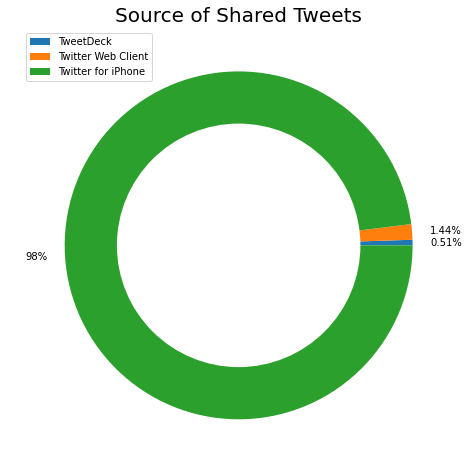

In [123]:
# Getting Unique Values of source and plotting it as a pie chart
twitter_archive_master['source'].value_counts().sort_index().plot(kind = 'pie', 
                                                                  labels = ['0.51%', '1.44%', '98%'], figsize = (10,8))

# Drwaing the circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding the circle to the pie chart
fig.gca().add_artist(centre_circle)

# Adding chart title
plt.title('Source of Shared Tweets', fontsize = 20)

# Adding legends
plt.legend(tweet_source.source, loc = 'upper left')

# Removing the ylabel axis
plt.ylabel(" ");

##### Observation

> We observe that 98% of the tweets made by WeRateDogs is from an Iphone. So Twitter for Iphone is the source with the highest shared tweets

### 2. Dog stage with the highest likes and retweets

In [124]:
# First create mini DataFrame containing Dog stage, likes and retweets. Excluding none
dog_stage = twitter_archive_master.groupby('dog_stage')[['favorite_count',
                                                         'retweet_count']].mean().sort_values(by= ['favorite_count',
                                                                                                   'retweet_count'], 
                                                                                              ascending = False)

# Setting index as column
dog_stage = dog_stage.reset_index(level=0)

# Filtering out dog stage rows excluding none                                                                                                                     #
dog_stage = dog_stage[dog_stage['dog_stage'] != 'none']
dog_stage

,dog_stage,favorite_count,retweet_count
0,puppo,20478.086957,5771.913043
1,doggo,17537.145161,5946.209677
2,floofer,11634.250000,3814.375000
4,pupper,6475.157895,1984.382775


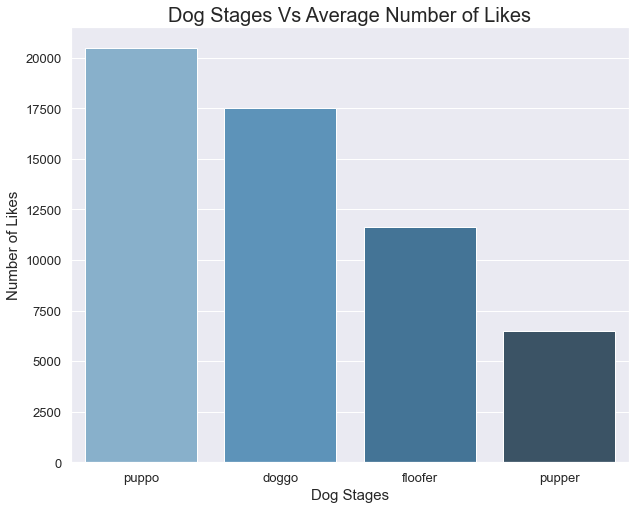

In [125]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (10,8)})

# Plotting a bar graph
sns.barplot(x = 'dog_stage', y = 'favorite_count', data = dog_stage, palette = "Blues_d")

# Setting title and axes labels
plt.title('Dog Stages Vs Average Number of Likes', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Dog Stages', fontsize = 15)
plt.ylabel('Number of Likes', fontsize = 15);


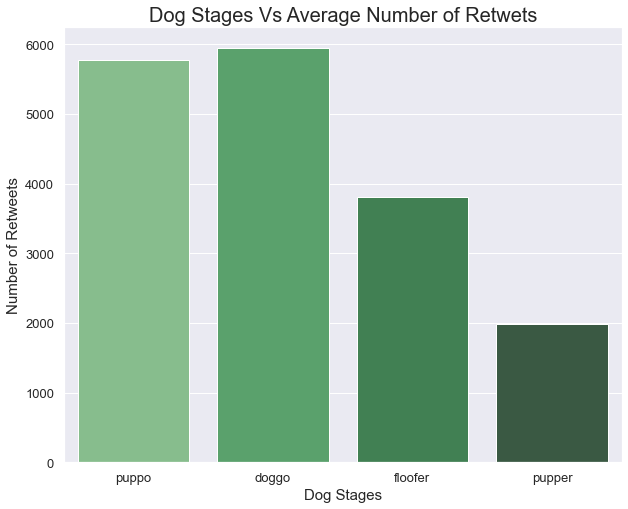

In [126]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (10,8)})

# Plotting a bar graph
sns.barplot(x = 'dog_stage', y = 'retweet_count', data = dog_stage, palette = "Greens_d")

# Setting title and axes labels
plt.title('Dog Stages Vs Average Number of Retwets', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Dog Stages', fontsize = 15)
plt.ylabel('Number of Retweets', fontsize = 15);

##### Observation

> From our bar plot we can see that the Dog stage with the higest like is puppo with an average of over 20,000 likes. They probably are the cutest when in that stage.

> The Doggo, dog satge has the highest number of retweets with an average of almost 6000 retweets.

## 3.  Dog Breed with the highest likes and retweets

In [127]:
# filtering out the top 10 breeds with the most likes into a DataFrame, to get the breed with the highest likes
top10_breed = twitter_archive_master[['breed', 'favorite_count']].sort_values(by = 'favorite_count', ascending = False ).head(10)
top10_breed

,breed,favorite_count
758,Labrador_retriever,144301
301,Lakeland_terrier,123704
390,Chihuahua,111237
107,French_bulldog,108542
792,Eskimo_dog,106828
58,English_springer,92525
324,standard_poodle,82421
133,malamute,80310
92,golden_retriever,73731
1386,Bedlington_terrier,73222


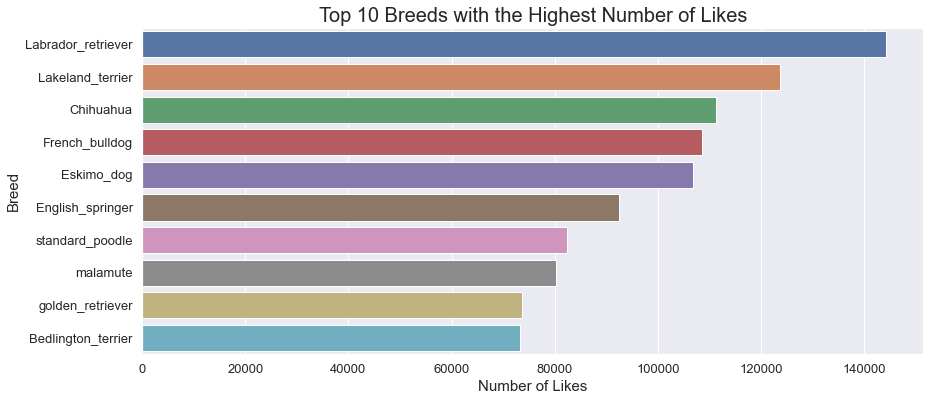

In [128]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (14,6)})

# Plotting a bar graph
sns.barplot(x = 'favorite_count', y = 'breed', data = top10_breed)

# Setting title and axes labels
plt.title('Top 10 Breeds with the Highest Number of Likes', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Number of Likes', fontsize = 15)
plt.ylabel('Breed', fontsize = 15);

In [129]:
# filtering out the top 10 breeds with the most retweets into a DataFrame, to get the breed with the highest retweet
top10_retweet = twitter_archive_master[['breed', 'retweet_count']].sort_values(by = 'retweet_count', ascending = False ).head(10)
top10_retweet

,breed,retweet_count
758,Labrador_retriever,70352
792,Eskimo_dog,52654
390,Chihuahua,51446
301,Lakeland_terrier,39770
58,English_springer,37274
324,standard_poodle,34425
392,cocker_spaniel,32232
107,French_bulldog,30065
1386,Bedlington_terrier,28466
1443,whippet,27658


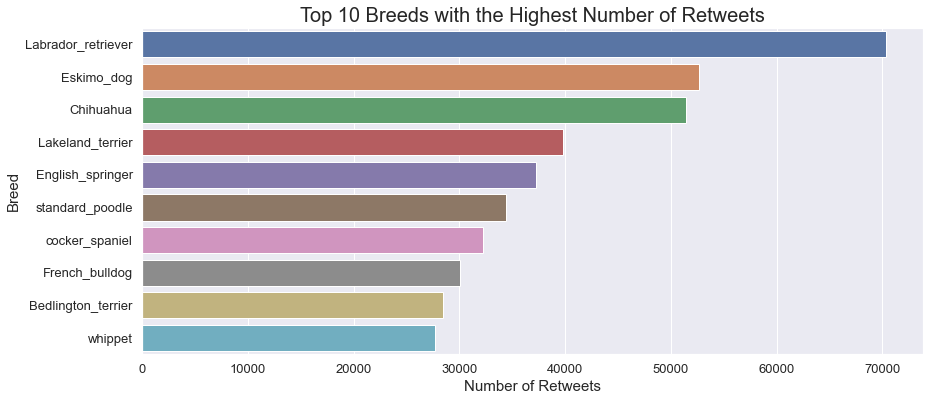

In [130]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (14,6)})

# Plotting a bar graph
sns.barplot(x = 'retweet_count', y = 'breed', data = top10_retweet)

# Setting title and axes labels
plt.title('Top 10 Breeds with the Highest Number of Retweets', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Number of Retweets', fontsize = 15)
plt.ylabel('Breed', fontsize = 15);

##### Observation

> Labrador retreivers seems to be the breed of dogs with the highest engagements respectively. With 144,301 likes and 70,352 retweets from the WeRateDogs account 

## 4. Dog stage with the highest ratings

In [131]:
# Creating a column with rating numerator divided by rating denominator to add to the dataframe for visualization
twitter_archive_master['ratings'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence,ratings
934,712085617388212225,2016-03-22 01:16:55+00:00,Twitter for iPhone,11,10,Olive,none,434,3012,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,Shih-Tzu,0.625129,1.1
1161,691444869282295808,2016-01-25 02:17:57+00:00,Twitter for iPhone,12,10,Bailey,none,750,2432,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,Bernese_mountain_dog,0.767563,1.2
1707,670444955656130560,2015-11-28 03:31:48+00:00,Twitter for iPhone,10,10,Paull,none,1737,6043,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,English_springer,0.403698,1.0
1109,696754882863349760,2016-02-08 17:58:03+00:00,Twitter for iPhone,10,10,Reptar,none,328,1370,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,toy_poodle,0.098378,1.0
183,846042936437604353,2017-03-26 16:55:29+00:00,Twitter for iPhone,12,10,Jarvis,none,2582,14783,https://pbs.twimg.com/media/C72_iaUVUAEhZSn.jpg,golden_retriever,0.961110,1.2


In [132]:
# Getting the average ratings
stage_rating = twitter_archive_master.groupby('dog_stage')['ratings'].mean().sort_values(ascending=False)

# Setting index as column
stage_rating= stage_rating.reset_index(level=0)

# Filtering out dog stage rows excluding none                                                                                                                     #
stage_rating = stage_rating[stage_rating['dog_stage'] != 'none']
stage_rating

,dog_stage,ratings
0,puppo,1.204348
1,floofer,1.187500
2,doggo,1.187097
4,pupper,1.072727


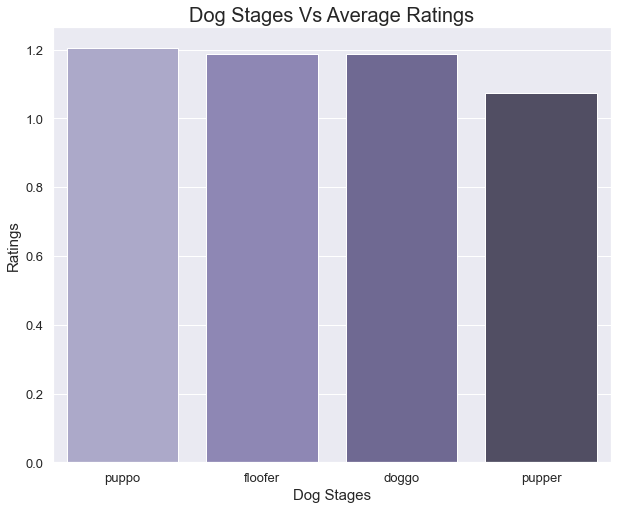

In [133]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (10,8)})

# Plotting a bar graph
sns.barplot(x = 'dog_stage', y = 'ratings', data = stage_rating, palette = "Purples_d")

# Setting title and axes labels
plt.title('Dog Stages Vs Average Ratings', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Dog Stages', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15);


##### Observation

> From the bar plot the average ratings of each dog stage don't seem to be far off from each other. But Puppo the cutest Dog stage from this analysis has the highest average rating of 1.2

## 5. Dog Breed with the Highest Ratings

In [134]:
#Removing the rows where breed is none
rating_visual = twitter_archive_master[twitter_archive_master['breed'] != 'none']

# filtering out the top 10 breeds with the highest ratings into a DataFrame, to get the breed with the highest ratings
top10_rating = rating_visual[['breed', 'ratings']].sort_values(by = 'ratings', ascending = False ).head(10)
top10_rating

,breed,ratings
492,Pomeranian,7.5
541,clumber,2.7
1337,kuvasz,2.6
315,Gordon_setter,1.4
150,black-and-tan_coonhound,1.4
389,golden_retriever,1.4
267,golden_retriever,1.4
270,Bedlington_terrier,1.4
249,bloodhound,1.4
246,Pembroke,1.4


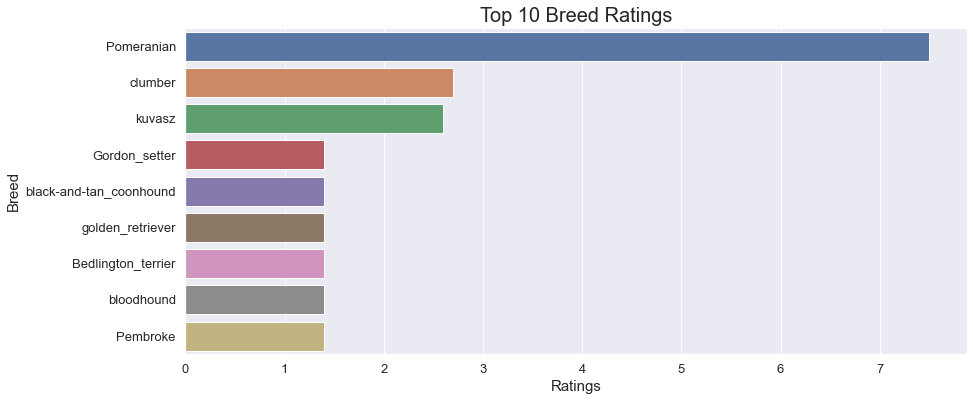

In [135]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (14,6)})

# Plotting a bar graph
sns.barplot(x = 'ratings', y = 'breed', data = top10_rating)

# Setting title and axes labels
plt.title('Top 10 Breed Ratings', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Breed', fontsize = 15);

##### Observation

> Oh well I was rooting for labradors. There is a probability that some of the breeds that were recorded as `none` were labradors, but I wouldn't know just guessing. 
> Well from our visuals we can see that Pomeranians have the highest ratings, It wouldn't be advisable to go off with this result because the breeds recorded as none, limited the analysis

## 6. Correlation between Likes and Retweets

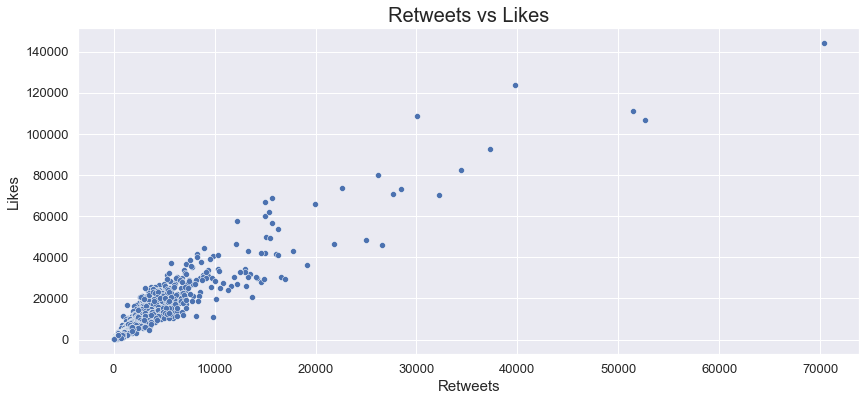

In [136]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (14,6)})

# Plotting a scatter chart to show correlation
sns.scatterplot(x = 'retweet_count', y = 'favorite_count', data = twitter_archive_master)

# Setting title and axes labels 
plt.title('Retweets vs Likes', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Retweets', fontsize = 15)
plt.ylabel('Likes', fontsize = 15);

##### Observation

> We can see a strong positive correlation between retweets and likes from the plot above. This shows that as a tweet gains more traction through retweets there is always an increase in likes on that tweet.

## 7. Correlation between Likes and Ratings

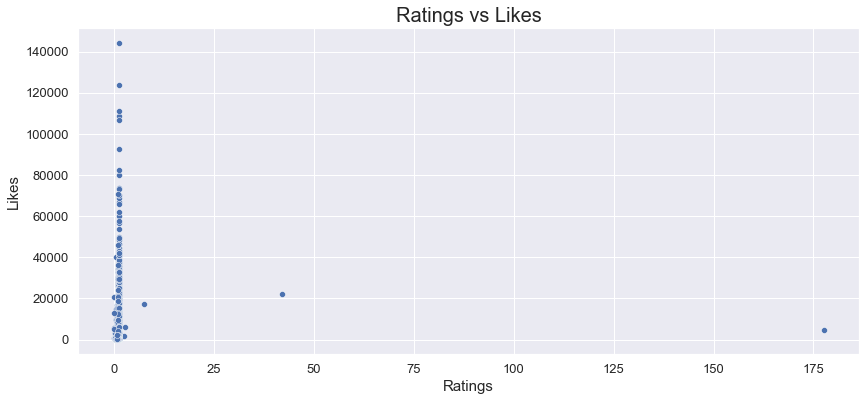

In [137]:
# Setting the size of the plot
sns.set(rc = {'figure.figsize' : (14,6)})

# Plotting to show correlation
sns.scatterplot(x = 'ratings', y = 'favorite_count', data = twitter_archive_master)

# Setting title and axes labels 
plt.title('Ratings vs Likes', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Likes', fontsize = 15);

##### Observation

> Yikes! There doesn"t seem to be any hint of correlation between Ratings and likes. This means that the likes of a does not have any effect on the ratings. So a labrador that looks cute on twitter does not neccessarily seem nice or effective in real life. Just an example I love labs!!